In [38]:
import requests

r=requests.get('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale')

In [39]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X,y=load_svmlight_file(f=BytesIO(r.content),n_features=13)
X=X.toarray()

In [40]:
import numpy

n_samples,n_features=X.shape
X=numpy.column_stack((X,numpy.ones((n_samples,1))))
y=y.reshape((-1,1))

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25)

In [42]:
X_train_transpose=X_train.transpose()
X_rank=numpy.dot(X_train_transpose,X_train)
w_=numpy.dot(numpy.dot(numpy.linalg.inv(X_rank),X_train_transpose),y_train)
# diff=numpy.dot(X_train,w)-y_train
Y_predict=numpy.dot(X,w_)
loss=numpy.average(numpy.abs(Y_predict-y))
print("Loss:",loss)
Y_predict=numpy.dot(X_train,w_)
loss_train=numpy.average(numpy.abs(Y_predict-y_train))
print("Loss_train:",loss_train)
Y_predict=numpy.dot(X_val,w_)
loss_val=numpy.average(numpy.abs(Y_predict-y_val))
print("Loss_val:",loss_val)

Loss: 3.3984128479458353
Loss_train: 3.4984374654307966
Loss_val: 3.0999141863174873


In [43]:
penalty_factor=0.5
learning_rate=0.0005
max_epoch=200
losses_train=[]
losses_val=[]

In [44]:
w = numpy.zeros((n_features + 1, 1))  # 用0初始化w的参数
# w = numpy.random.random((n_features + 1, 1))  # 使用随机数初始化w的参数
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # 使用正态分布随机数初始化w的参数

In [45]:
for epoch in range(max_epoch):
    diff=numpy.dot(X_train,w)-y_train
    G=+numpy.dot(X_train.transpose(),diff)
    D=-G
    w+=learning_rate*D
    Y_predict=numpy.dot(X_train,w)
    loss_train=numpy.average(numpy.abs(Y_predict-y_train))
    losses_train.append(loss_train)

    Y_predict=numpy.dot(X_val,w)
    loss_val=numpy.average(numpy.abs(Y_predict-y_val))
    losses_val.append(loss_val)

Text(0.5, 1.0, 'The graph of absolute diff value varing with the number of iterations')

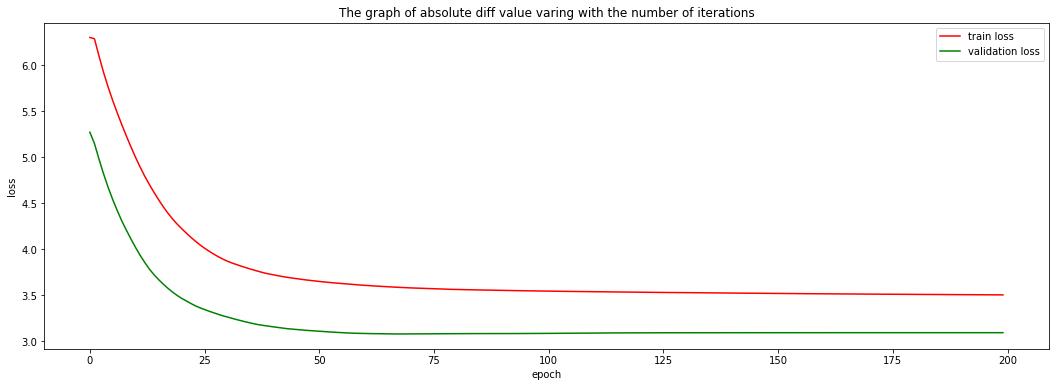

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.plot(losses_train,"-",color="r",label="train loss")
plt.plot(losses_val,"-",color='g',label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('The graph of absolute diff value varing with the number of iterations')
